<a href="https://www.kaggle.com/code/rewa77/asl-detection-text-to-speech?scriptVersionId=167232729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2024-03-16 01:50:12.899645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 01:50:12.899743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 01:50:13.071669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = r'/kaggle/input/asl-dataset/asl_dataset/asl_dataset/'
labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d',
          'e','f','g','h','i','j','k','l','m','n','o','p','q','r',
          's','t','u','v','w','x','y','z']

In [3]:
labels = os.listdir(train_dir)
X_train = []
y_train = []
X_valid = []
y_valid = []
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    for file in os.listdir(folderpath)[0:60]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[60:70]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(2160, 224, 224, 3)
(2160,)
(355, 224, 224, 3)
(355,)


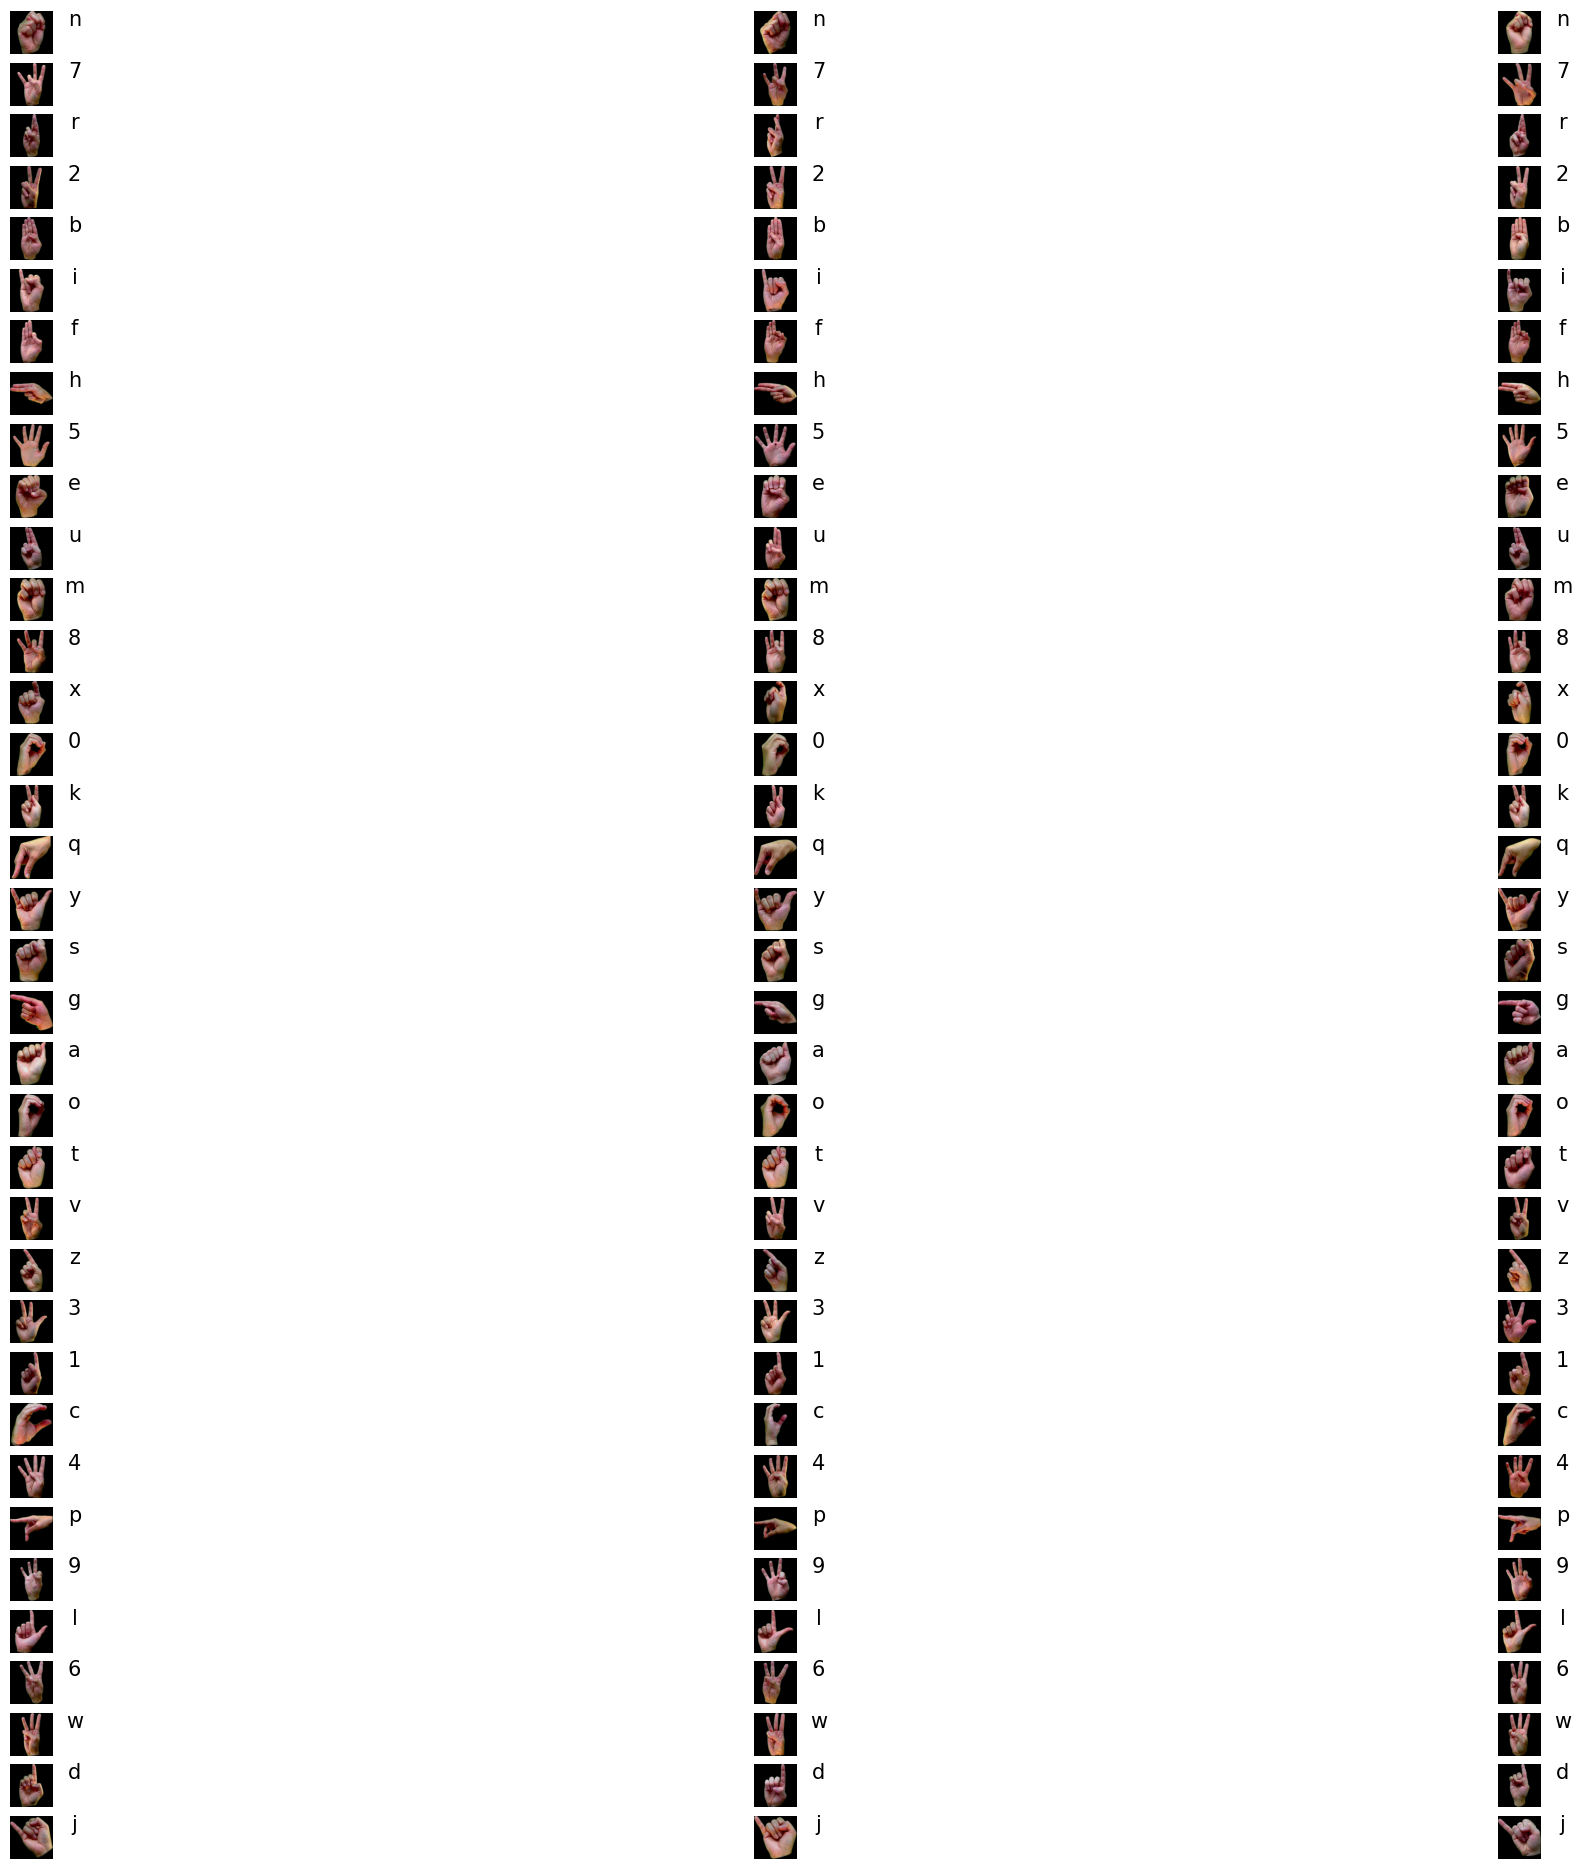

In [4]:
# display 3 random images with their labels
fig, axes = plt.subplots(nrows=len(labels), ncols=3, figsize=(24, 24))
fig.subplots_adjust(wspace=1)
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    img_names = os.listdir(folderpath)[:3]
    for j, img_name in enumerate(img_names):
        img_path = folderpath + img_name
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].text(1.5, 0.8, label[-1], fontsize=15, ha='center', va='center', transform=axes[i, j].transAxes)
plt.show()

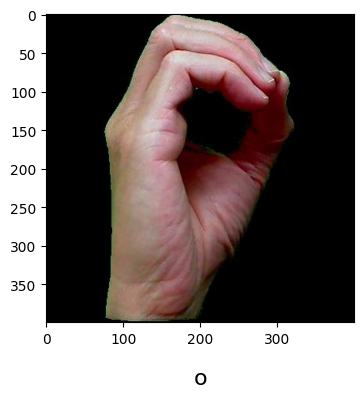

In [5]:
# choose a random label and a random image from the label folder
label = random.choice(labels) 
folderpath = train_dir + label + '/'
img_names = os.listdir(folderpath)[:3]
img_name = random.choice(img_names)  

# display the image with its label
fig, ax = plt.subplots(figsize=(4, 4))
img_path = folderpath + img_name
img = plt.imread(img_path)
ax.imshow(img)
ax.text(0.5, -0.2, label, fontsize=16, ha='center', transform=ax.transAxes)

plt.show()

In [6]:
# define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), 
    Dense(128, activation='relu'), #FC layer
    Dropout(0.5),
    Dense(len(labels), activation='softmax') # last dense layer (the classifier)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [9]:
# train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop])

Epoch 1/50
 1/34 ━━━━━━━━━━━━━━━━━━━━ 9:04 17s/step - accuracy: 0.0312 - loss: 25.2604

I0000 00:00:1710553871.915320      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710553871.934083      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.1424 - loss: 32.3008

W0000 00:00:1710553885.948689      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 525ms/step - accuracy: 0.1462 - loss: 31.7335 - val_accuracy: 0.7775 - val_loss: 0.8947
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6518 - loss: 1.1177 - val_accuracy: 0.8732 - val_loss: 0.3779
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8074 - loss: 0.5821 - val_accuracy: 0.9239 - val_loss: 0.2453
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8690 - loss: 0.3945 - val_accuracy: 0.9465 - val_loss: 0.2406
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9113 - loss: 0.2511 - val_accuracy: 0.9408 - val_loss: 0.2121
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9355 - loss: 0.1992 - val_accuracy: 0.9437 - val_loss: 0.2244
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9354 - loss: 0.2006 - val_accuracy: 0.9408 - val_loss: 0.2412
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9397 - loss: 0.1714 - val_accuracy: 0.9465 - val_loss:

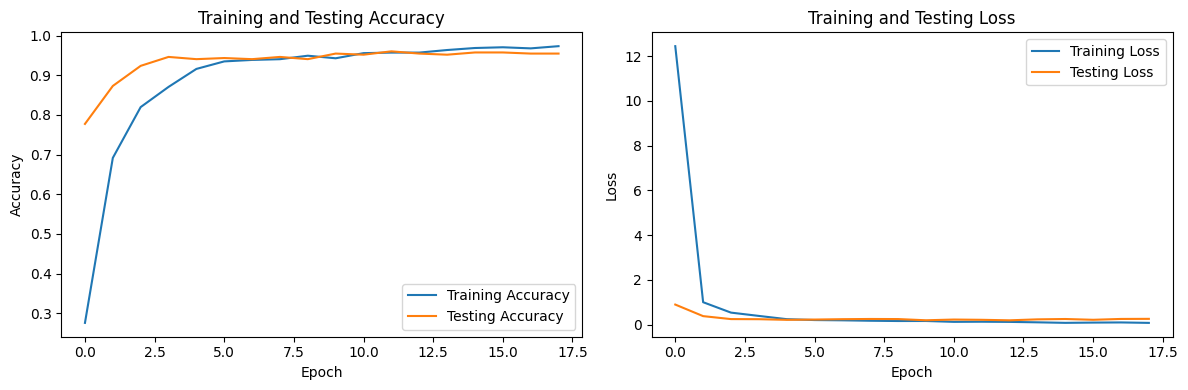

In [10]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Save the trained model for future use
model.save('sign_language_model.h5')

In [12]:
# evaluate the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', train_acc)

68/68 - 6s - 87ms/step - accuracy: 1.0000 - loss: 5.8365e-04
Train accuracy: 1.0


In [13]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose=2)
print('Test accuracy:', test_acc)

12/12 - 1s - 96ms/step - accuracy: 0.9549 - loss: 0.2336
Test accuracy: 0.9549295902252197


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


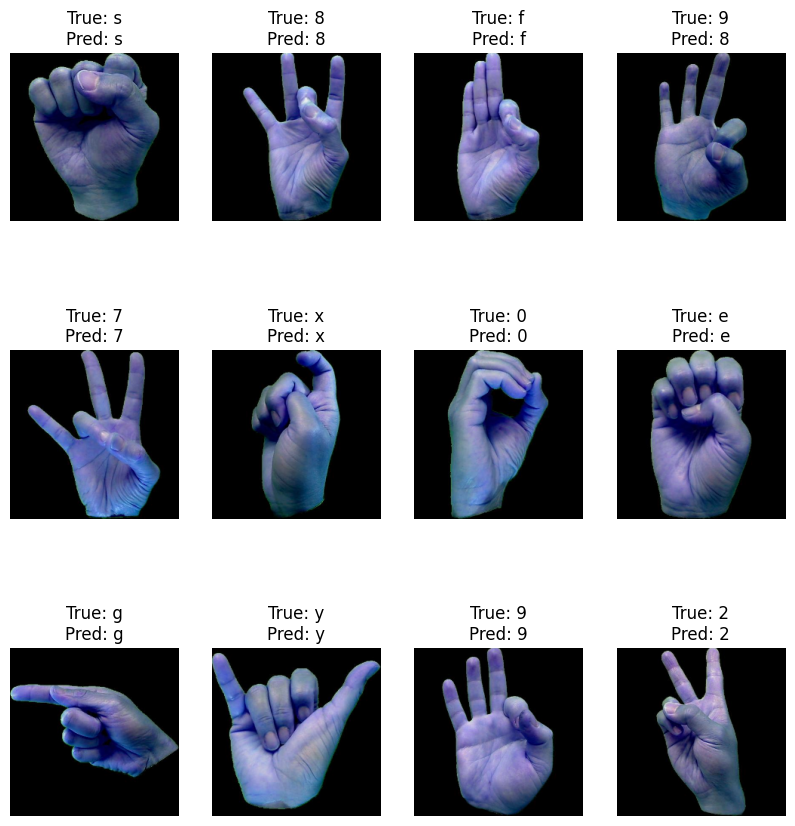

In [14]:
 #get the predicted labels for the test set
y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)

# display random predictions
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.7, wspace= 0.2)
for i, ax in enumerate(axs.flat):
    idx = random.randint(0, len(X_valid)-1) 
    ax.imshow(X_valid[idx])
    ax.set_title(f"True: {labels[y_valid[idx]]}\nPred: {labels[y_pred_labels[idx]]}")
    ax.axis('off')
plt.show()

In [15]:
pip install gtts

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [17]:
import random
from gtts import gTTS
import IPython.display as ipd
import time

def speak(y_pred_labels, y_valid, labels):
    elements = random.sample(range(len(y_pred_labels)), 3)
    
    pred_labels = [y_pred_labels[idx] for idx in elements]
    true_labels = [y_valid[idx] for idx in elements]
    
    # Iterate over the selected samples and speak out both true and predicted labels
    for i, (pred_label, true_label) in enumerate(zip(pred_labels, true_labels)):
        pred_label_text = labels[pred_label]
        true_label_text = labels[true_label]
        
        # Speak out the predicted label
        pred_text = f"Predicted Label: {pred_label_text}"
        pred_speech = gTTS(text=pred_text, lang="en", slow=False)
        pred_speech_file = f"predicted_label_{i}.mp3"
        pred_speech.save(pred_speech_file)
        print(pred_text) 
        ipd.display(ipd.Audio(pred_speech_file, autoplay=True))
        time.sleep(5)  # Add a delay between speaking predicted and true labels
        
        # Speak out the true label
        true_text = f"True Label: {true_label_text}"
        true_speech = gTTS(text=true_text, lang="en", slow=False)
        true_speech_file = f"true_label_{i}.mp3"
        true_speech.save(true_speech_file)
        print(true_text) 
        ipd.display(ipd.Audio(true_speech_file, autoplay=True))
        time.sleep(5)  
        
        os.remove(pred_speech_file)
        os.remove(true_speech_file)
        
speak(y_pred_labels, y_valid, labels)


Predicted Label: 5


True Label: 5


Predicted Label: m


True Label: m


Predicted Label: 7


True Label: 7


In [18]:
# import cv2
# import numpy as np
# import mediapipe as mp
# import tensorflow as tf

# model = tf.keras.models.load_model('sign_language_model (2).h5')
# labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

# cap = cv2.VideoCapture(0)
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands()

# while True:
#     ret, frame = cap.read()
#     # Convert the frame to RGB
#     if frame is not None:
#         rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         results = hands.process(rgb_frame)

#         if results.multi_hand_landmarks:
#             # Get the bounding box of the hand
#             for landmarks in results.multi_hand_landmarks:
#                     x_min, x_max, y_min, y_max = 1000, 0, 1000, 0
#                     for landmark in landmarks.landmark:
#                         x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
#                         if x < x_min:
#                             x_min = x
#                         if x > x_max:
#                             x_max = x
#                         if y < y_min:
#                             y_min = y
#                         if y > y_max:
#                             y_max = y
#             # Extract hand region
#             hand_frame = frame[y_min:y_max, x_min:x_max]
#             if hand_frame.shape[0] > 0 and hand_frame.shape[1] > 0:

#                     resized_hand_frame = cv2.resize(hand_frame, (224, 224))  
#                     normalized_hand_frame = resized_hand_frame / 255.0 

#                     input_frame = np.expand_dims(normalized_hand_frame, axis=0)  # batch dimension
#                     prediction = model.predict(input_frame)
#                     predicted_label = np.argmax(prediction)

#                     letter = labels[predicted_label]
#                     cv2.putText(hand_frame, letter, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#                     cv2.imshow('Original Frame', frame)
#                     cv2.imshow('Hand Frame', hand_frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
